In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Inspect actions (portfolio weights)
Note: Backtest must be completed before insection of its actions can be done.

In [2]:
def make_int(x):
    try:
        if x.is_integer():
            x = int(x)
        return x
    except Exception as e:
        return x

In [3]:
def get_actions(market_name, model_base_name, gamma_trade, gamma_risk, gamma_hold, seed=0):
    return pd.read_csv(f'../experiments/{market_name}/seeded/{model_base_name}/seed_{seed}/trade_{gamma_trade}_risk_{gamma_risk}_hold_{gamma_hold}/actions.csv', index_col=0, parse_dates=True)

In [4]:
# papermill parameters
# specify which backtest to inspect
MARKET_NAME = 'DOW_30' # use either | 'DOW_30' | 'LA_40' | 'NIK_25' |
MODEL_BASE_NAME = 'RL_CNN' # use either | 'RL_CNN' | 'RL_str_fcast' | 'RL_all_inp' |
N = 10 # how many plots to make
SEED = 0 # don't change - backtests were only done for seed=0

In [5]:
# create directory to save action plots if it doesn't exist already
if not os.path.exists(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}'):
    os.makedirs(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}')

In [6]:
# see the possible gamma values to select from (these were all on the frontier for the given seed)
frontier_df = pd.read_csv(f'../experiments/{MARKET_NAME}/seeded/{MODEL_BASE_NAME}/backtests/{MARKET_NAME}_{MODEL_BASE_NAME}_seed_frontiers.csv')
frontier_df = frontier_df[frontier_df['seed']==SEED]
frontier_df = frontier_df.sort_values(by=['excess_risk', 'sharpe'], ascending=True)
frontier_df.head()

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,75,500.0,75.0,0,-2.765032,1.145705,-2.413389,True
1,100,500.0,75.0,0,-2.466495,1.148994,-2.146656,True
2,250,1000.0,50.0,0,-2.004075,1.159273,-1.728734,True
3,250,1000.0,75.0,0,-1.981788,1.175389,-1.686070,True
4,100,500.0,100.0,0,-1.914923,1.244722,-1.538434,True


In [7]:
# gamma_trade_list = [make_int(i) for i in list(frontier_df['gamma_trade'].round(3))]
# gamma_risk_list = [make_int(j) for j in list(frontier_df['gamma_risk'].round(3))]
# gamma_hold_list = [make_int(k) for k in list(frontier_df['gamma_hold'].round(3))]

# GAMMA_TRIOS = list(zip(gamma_trade_list, gamma_risk_list, gamma_hold_list))
# GAMMA_TRIOS

In [8]:
# get N risk brackets
risk_min = frontier_df['excess_risk'].min()
risk_max = frontier_df['excess_risk'].max()
risk_range = risk_max - risk_min
risk_jump = risk_range/N

print(f'min={risk_min} - max={risk_max}')
print(f'jump={risk_jump}')

risk_brackets = [( risk_min+(i*risk_jump) , risk_min+((i+1)*risk_jump) ) for i in range(N)]

min=1.1457051504454407 - max=30.012980002481584
jump=2.886727485203614


In [9]:
# risk_brackets

In [10]:
frontier_df

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,75,500.0,75.0,0,-2.765032,1.145705,-2.413389,True
1,100,500.0,75.0,0,-2.466495,1.148994,-2.146656,True
2,250,1000.0,50.0,0,-2.004075,1.159273,-1.728734,True
3,250,1000.0,75.0,0,-1.981788,1.175389,-1.686070,True
4,100,500.0,100.0,0,-1.914923,1.244722,-1.538434,True
...,...,...,...,...,...,...,...,...
58,25,5.0,1.0,0,16.574881,15.299089,1.083390,True
59,25,5.0,0.1,0,17.298466,16.067283,1.076627,True
60,5,5.0,1.0,0,17.640122,18.157867,0.971486,True
61,10,5.0,1.0,0,20.418012,19.267267,1.059725,True


[1/10]	bracket=(1.15, 4.03)
[2/10]	bracket=(4.03, 6.92)
[3/10]	bracket=(6.92, 9.81)
[4/10]	bracket=(9.81, 12.69)
[5/10]	bracket=(12.69, 15.58)
[6/10]	bracket=(15.58, 18.47)
[7/10]	bracket=(18.47, 21.35)
	no result for [8/10] index 0 is out of bounds for axis 0 with size 0
	no result for [9/10] index 0 is out of bounds for axis 0 with size 0
	no result for [10/10] index 0 is out of bounds for axis 0 with size 0


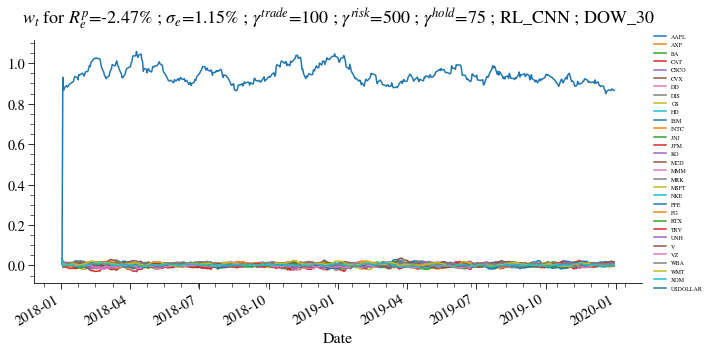

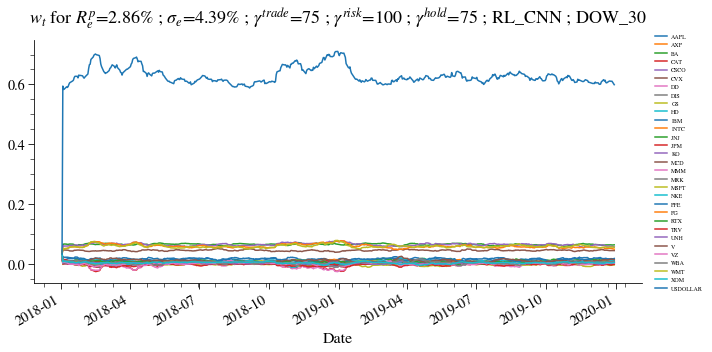

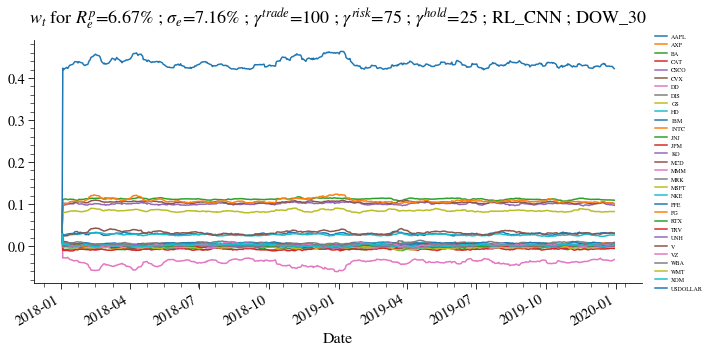

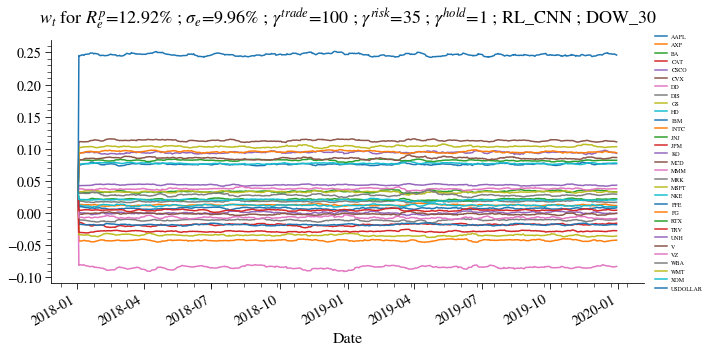

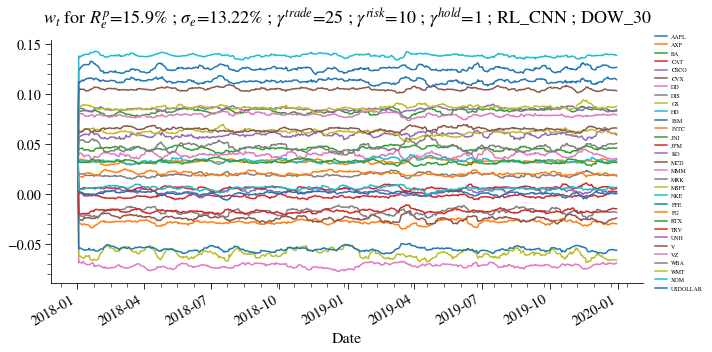

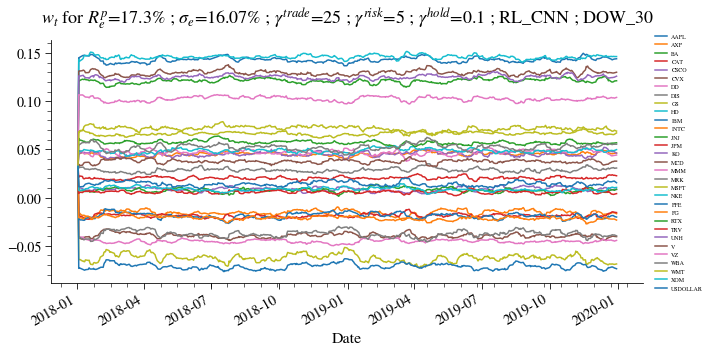

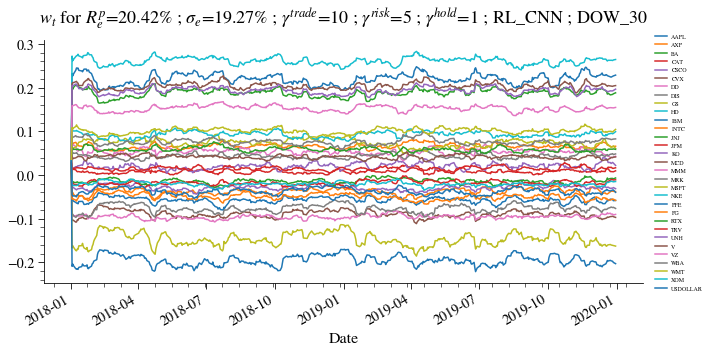

In [11]:
for n in range(N):
    try:
        #idx = (len(frontier_df)//N) * n 
        #GAMMA_TRADE, GAMMA_RISK = GAMMA_PAIRS[idx]
        #print(f'[{m+1}/{N}]\tidx={idx}\tgammas=({GAMMA_TRADE}, {GAMMA_RISK})')
        
        bracket = risk_brackets[n]
        result = frontier_df[(frontier_df['excess_risk']>bracket[0]) & \
                             (frontier_df['excess_risk']<bracket[1])].head(1)
        ret = result['excess_return'].values[0]
        risk = result['excess_risk'].values[0]
        
        GAMMA_TRADE = make_int(result['gamma_trade'].values[0])
        GAMMA_RISK = make_int(result['gamma_risk'].values[0])
        GAMMA_HOLD = make_int(result['gamma_hold'].values[0])

        rl_actions = get_actions(market_name=MARKET_NAME, 
                                 model_base_name=MODEL_BASE_NAME, 
                                 gamma_trade=GAMMA_TRADE, 
                                 gamma_risk=GAMMA_RISK, 
                                 gamma_hold=GAMMA_HOLD, 
                                 seed=SEED)

        print(f'[{n+1}/{N}]\tbracket=({round(bracket[0],2)}, {round(bracket[1],2)})')

        #result = frontier_df[(frontier_df['gamma_trade']==GAMMA_TRADE) & \
        #                  (frontier_df['gamma_risk']==GAMMA_RISK) & \
        #                  (frontier_df['seed']==SEED)]
        

        plot_title = '$w_t$ for $R^p_e$='+f'{round(ret,2)}% ; '+ \
                    '$\sigma_e$='+f'{round(risk,2)}% ; '+\
                    '$\gamma^{trade}$='+f'{GAMMA_TRADE} ; '+\
                    '$\gamma^{risk}$='+f'{GAMMA_RISK} ; '+\
                    '$\gamma^{hold}$='+f'{GAMMA_HOLD} ; '+\
                    f'{MODEL_BASE_NAME} ; {MARKET_NAME}'

        rl_actions.plot(legend=False, figsize=(10,5), title=plot_title)
        plt.legend(bbox_to_anchor=(1.11, 1.05), prop={'size': 6})
        plt.savefig(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}/{n}.png') #_risk_{GAMMA_RISK}_trade_{GAMMA_TRADE}.png')
        
    except Exception as e:
        print(f'\tno result for [{n+1}/{N}]', e)

In [12]:
rl_actions

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,USDOLLAR
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,...,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258
2018-01-03,0.232398,-0.040568,0.200521,0.011427,-0.031100,-0.104406,-0.099457,-0.090421,-0.167234,0.272359,...,-0.055161,0.064225,0.012597,0.204714,0.043886,0.158574,0.084902,0.108442,-0.023512,-0.045799
2018-01-04,0.227229,-0.040421,0.196387,0.013471,-0.027670,-0.103099,-0.091488,-0.090149,-0.162143,0.261930,...,-0.054146,0.058607,0.012157,0.204068,0.036807,0.158403,0.086864,0.104837,-0.023569,-0.048311
2018-01-05,0.231458,-0.044315,0.200635,0.013142,-0.029170,-0.104208,-0.093100,-0.093617,-0.165603,0.264772,...,-0.055477,0.058918,0.015361,0.205356,0.038131,0.159284,0.086764,0.107717,-0.024185,-0.047889
2018-01-08,0.239989,-0.049552,0.206377,0.011604,-0.032912,-0.108090,-0.093726,-0.097016,-0.173023,0.271294,...,-0.057698,0.058682,0.015757,0.208274,0.039156,0.161270,0.090040,0.111076,-0.023995,-0.048208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.224788,-0.038509,0.183447,0.017094,-0.031058,-0.095339,-0.087652,-0.074614,-0.159290,0.262654,...,-0.057603,0.058954,0.007819,0.192787,0.038301,0.154257,0.081966,0.100050,-0.015184,-0.036727
2019-12-24,0.224115,-0.037138,0.183876,0.017823,-0.030387,-0.095309,-0.089739,-0.073407,-0.160405,0.262914,...,-0.056777,0.059160,0.007771,0.192523,0.040149,0.154116,0.080977,0.099859,-0.014222,-0.036077
2019-12-26,0.225809,-0.037197,0.184580,0.015127,-0.030317,-0.094553,-0.089604,-0.074739,-0.161284,0.262199,...,-0.055052,0.059138,0.007330,0.192587,0.039829,0.153737,0.081648,0.098484,-0.015324,-0.034388


In [13]:
print('done.')

done.
